# **FULL DATASET MULTICLASS**

## **Preliminary steps**

In [16]:
### PACKAGES

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

In [17]:
### FUNCTIONS

from src.configs import constants, ml_config, names
from src.libs import preprocessing, evaluation, visualization
from src.embedding.tf_idf import TfIdfEmbedding
from src.embedding.punctuation import PunctuationEmbedding
from src.classifier.classifier import LightGBMClassifier, RFClassifier, NBClassifier

## **DATA**

In [18]:
### LOAD DATA

df_poetry_gpt = preprocessing.load_dataset(source="GPT", type="POETRY")
df_poetry_bard = preprocessing.load_dataset(source="BARD", type="POETRY")
df_poetry_human = preprocessing.load_dataset(source="Human", type="POETRY")

df_essay_gpt = preprocessing.load_dataset(source="GPT", type="ESSAY")
df_essay_bard = preprocessing.load_dataset(source="BARD", type="ESSAY")
df_essay_human = preprocessing.load_dataset(source="Human", type="ESSAY")

df_story_gpt = preprocessing.load_dataset(source="GPT", type="STORY")
df_story_bard = preprocessing.load_dataset(source="BARD", type="STORY")
df_story_human = preprocessing.load_dataset(source="Human", type="STORY")

Time taken to load dataset: 0.008483171463012695 seconds
Time taken to load dataset: 0.007658720016479492 seconds
Time taken to load dataset: 0.36322879791259766 seconds
Time taken to load dataset: 0.016533613204956055 seconds
Time taken to load dataset: 0.011862993240356445 seconds
Time taken to load dataset: 0.09612822532653809 seconds
Time taken to load dataset: 0.00984334945678711 seconds
Time taken to load dataset: 0.019774675369262695 seconds
Time taken to load dataset: 0.014120817184448242 seconds


In [19]:
### GET TRAIN SPLIT

df_train_poetry_gpt, df_test_poetry_gpt = preprocessing.train_valid_split(df_poetry_gpt)
df_train_poetry_bard, df_test_poetry_bard = preprocessing.train_valid_split(
    df_poetry_bard
)
df_train_poetry_human, df_test_poetry_human = preprocessing.train_valid_split(
    df_poetry_human
)

df_train_essay_gpt, df_test_essay_gpt = preprocessing.train_valid_split(df_essay_gpt)
df_train_essay_bard, df_test_essay_bard = preprocessing.train_valid_split(df_essay_bard)
df_train_essay_human, df_test_essay_human = preprocessing.train_valid_split(
    df_essay_human
)

df_train_story_gpt, df_test_story_gpt = preprocessing.train_valid_split(df_story_gpt)
df_train_story_bard, df_test_story_bard = preprocessing.train_valid_split(df_story_bard)
df_train_story_human, df_test_story_human = preprocessing.train_valid_split(
    df_story_human
)

In [20]:
### GET FULL DATASETS

df_train_poetry = preprocessing.get_poetry_dataset(
    df_train_poetry_gpt,
    df_train_poetry_bard,
    df_train_poetry_human,
    samples_per_source=min(
        len(df_train_poetry_gpt), len(df_train_poetry_bard), len(df_train_poetry_human)
    ),
)
df_test_poetry = preprocessing.get_poetry_dataset(
    df_test_poetry_gpt,
    df_test_poetry_bard,
    df_test_poetry_human,
    samples_per_source=None,
)

df_train_essay = preprocessing.get_essay_dataset(
    df_train_essay_gpt,
    df_train_essay_bard,
    df_train_essay_human,
    samples_per_source=min(
        len(df_train_essay_gpt), len(df_train_essay_bard), len(df_train_essay_human)
    ),
)
df_test_essay = preprocessing.get_essay_dataset(
    df_test_essay_gpt, df_test_essay_bard, df_test_essay_human, samples_per_source=None
)

df_train_story = preprocessing.get_story_dataset(
    df_train_story_gpt,
    df_train_story_bard,
    df_train_story_human,
    samples_per_source=min(
        len(df_train_story_gpt), len(df_train_story_bard), len(df_train_story_human)
    ),
)
df_test_story = preprocessing.get_story_dataset(
    df_test_story_gpt, df_test_story_bard, df_test_story_human, samples_per_source=None
)

In [21]:
### CONCATENATE ALL DATASETS

df_train = pd.concat([df_train_poetry, df_train_essay, df_train_story], axis=0).sample(
    frac=1
)
df_test = pd.concat([df_test_poetry, df_test_essay, df_test_story], axis=0).sample(
    frac=1
)


In [22]:
### SPLIT FEATURES AND LABELS

X_train, y_train = preprocessing.split_features_and_labels(df_train)
X_test, y_test = preprocessing.split_features_and_labels(df_test)
X_test_poetry, y_test_poetry = preprocessing.split_features_and_labels(df_test_poetry)
X_test_essay, y_test_essay = preprocessing.split_features_and_labels(df_test_essay)
X_test_story, y_test_story = preprocessing.split_features_and_labels(df_test_story)

## **CLASSIFICATION USING PUNCTUATION & RANDOM FOREST**

In [23]:
ID_EXPERIMENT = 211

In [24]:
### EMBEDDING

embedding_211 = PunctuationEmbedding(ID_EXPERIMENT)

X_train_211 = embedding_211.transform(X=X_train)
X_test_211 = embedding_211.transform(X=X_test)
X_test_poetry_211 = embedding_211.transform(X=X_test_poetry)
X_test_essay_211 = embedding_211.transform(X=X_test_essay)
X_test_story_211 = embedding_211.transform(X=X_test_story)

In [25]:
### CLASSIFIER

classifier_211 = LightGBMClassifier(ID_EXPERIMENT)

classifier_211.train(X_train=X_train_211, y_train=y_train)

metrics_211 = classifier_211.evaluate(X_test_211, y_test)
metrics_poetry_211 = classifier_211.evaluate(X_test_poetry_211, y_test_poetry)
metrics_essay_211 = classifier_211.evaluate(X_test_essay_211, y_test_essay)
metrics_story_211 = classifier_211.evaluate(X_test_story_211, y_test_story)

print(f"Metrics on test set: {metrics_211}")
print(f"Metrics on poetry: {metrics_poetry_211}")
print(f"Metrics on essay: {metrics_essay_211}")
print(f"Metrics on story: {metrics_story_211}")

Metrics on test set: {'accuracy': 0.6309111880046137, 'precision': 0.3979713450397316, 'recall': 0.7211656906778857, 'f1': 0.37520977802108924}
Metrics on poetry: {'accuracy': 0.6292613636363636, 'precision': 0.3592549499764622, 'recall': 0.688514755684567, 'f1': 0.3062134576235997}
Metrics on essay: {'accuracy': 0.6125461254612546, 'precision': 0.42194891201513723, 'recall': 0.6330634278002699, 'f1': 0.3971125468612906}
Metrics on story: {'accuracy': 0.7636363636363637, 'precision': 0.7015873015873016, 'recall': 0.688888888888889, 'f1': 0.6881758764111705}


In [26]:
### INTERPRETABILITY - FEATURE IMPORTANCE

dim_names_211 = embedding_211.map_dimensions_to_names()
feature_importances_211 = classifier_211.get_feature_importance()
most_important_features_211 = np.argsort(feature_importances_211)[-10:][::-1]
for i in most_important_features_211:
    print(f"{dim_names_211[i]}: {feature_importances_211[i]}")

ratio_words_per_sentence: 2946
ratio_odd_characters: 2775
ratio_punctuations: 2606


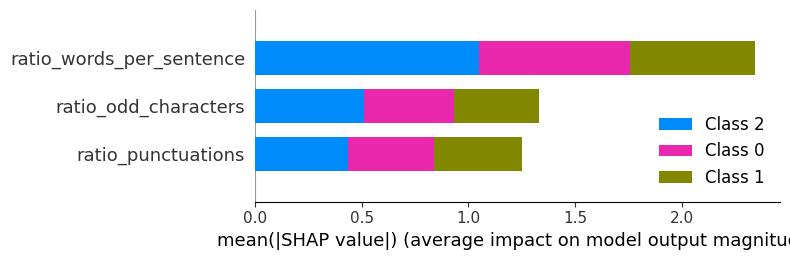

In [27]:
### INTERPRETABILITY - SHAP VALUES

explainer_211 = shap.Explainer(classifier_211.classifier)

if hasattr(X_test_211, "toarray"):
    X_test_211 = X_test_211.toarray()

# Calculate SHAP values
shap_values_211 = explainer_211(X_test_211)

# Visualize the SHAP values
shap.summary_plot(shap_values_211, X_test_211, feature_names=dim_names_211)

## **CLASSIFICATION USING TF-IDF & LGBM**

In [28]:
ID_EXPERIMENT = 111

In [29]:
### EMBEDDING

embedding_111 = TfIdfEmbedding(ID_EXPERIMENT)

embedding_111.fit(X=X_train)

X_train_111 = embedding_111.transform(X=X_train)
X_test_111 = embedding_111.transform(X=X_test)
X_test_poetry_111 = embedding_111.transform(X=X_test_poetry)
X_test_essay_111 = embedding_111.transform(X=X_test_essay)
X_test_story_111 = embedding_111.transform(X=X_test_story)

In [30]:
### CLASSIFIER

classifier_111 = LightGBMClassifier(ID_EXPERIMENT)

classifier_111.train(X_train=X_train_111, y_train=y_train)

metrics_111 = classifier_111.evaluate(X_test_111, y_test)
metrics_poetry_111 = classifier_111.evaluate(X_test_poetry_111, y_test_poetry)
metrics_essay_111 = classifier_111.evaluate(X_test_essay_111, y_test_essay)
metrics_story_111 = classifier_111.evaluate(X_test_story_111, y_test_story)

print(f"Metrics on test set: {metrics_111}")
print(f"Metrics on poetry: {metrics_poetry_111}")
print(f"Metrics on essay: {metrics_essay_111}")
print(f"Metrics on story: {metrics_story_111}")

Metrics on test set: {'accuracy': 0.9134948096885813, 'precision': 0.6032592248368881, 'recall': 0.8457904561563098, 'f1': 0.6742879059985771}
Metrics on poetry: {'accuracy': 0.9055397727272727, 'precision': 0.41297189666684275, 'recall': 0.7161877116594098, 'f1': 0.4511629704184969}
Metrics on essay: {'accuracy': 0.966789667896679, 'precision': 0.7459349593495935, 'recall': 0.7779352226720647, 'f1': 0.7600818871609946}
Metrics on story: {'accuracy': 0.8545454545454545, 'precision': 0.8059139784946238, 'recall': 0.7444444444444445, 'f1': 0.737392661982826}


In [31]:
### INTERPRETABILITY - FEATURE IMPORTANCE

dim_names_111 = embedding_111.map_dimensions_to_names()
feature_importances_111 = classifier_111.get_feature_importance()
most_important_features_111 = np.argsort(feature_importances_111)[-10:][::-1]
for i in most_important_features_111:
    print(f"{dim_names_111[i]}: {feature_importances_111[i]}")

like: 383
world: 292
help: 269
time: 193
make: 189
know: 185
really: 180
believe: 150
people: 138
heart: 132


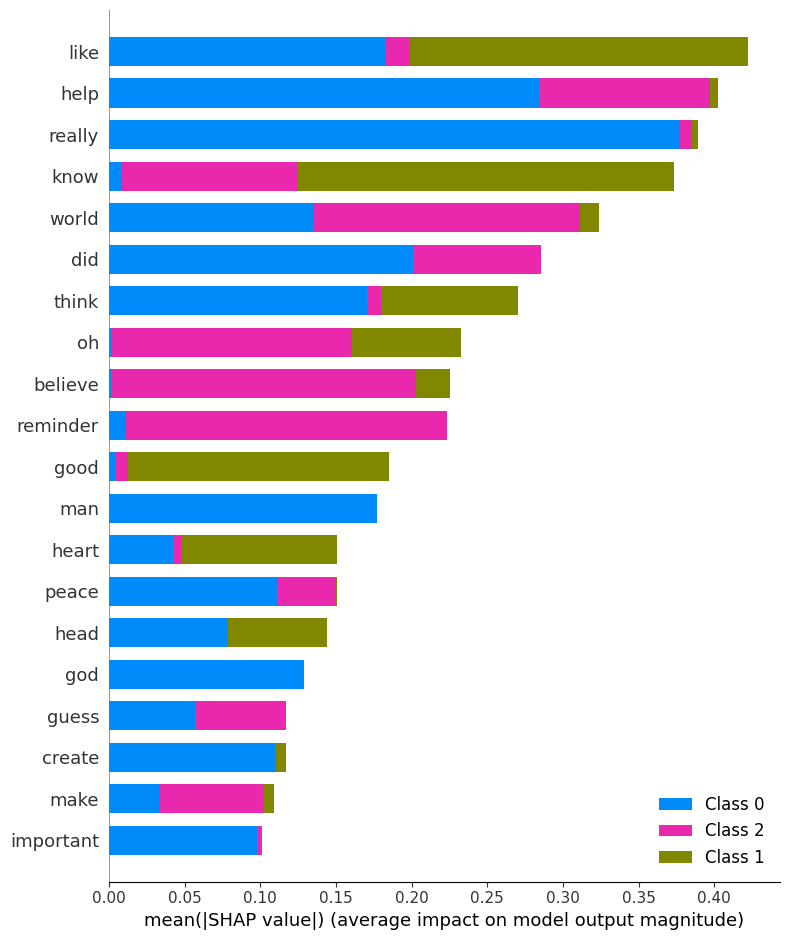

In [32]:
### INTERPRETABILITY - SHAP VALUES

explainer_111 = shap.Explainer(classifier_111.classifier)

if hasattr(X_test_111, "toarray"):
    X_test_111 = X_test_111.toarray()

# Calculate SHAP values
shap_values_111 = explainer_111(X_test_111)


# Visualize the SHAP values
shap.summary_plot(shap_values_111, X_test_111, feature_names=dim_names_111)

## **CLASSIFICATION USING TF-IDF & RANDOM FOREST**

In [33]:
ID_EXPERIMENT = 121

In [34]:
### EMBEDDING

embedding_121 = TfIdfEmbedding(ID_EXPERIMENT)

embedding_121.fit(X=X_train)

X_train_121 = embedding_121.transform(X=X_train)
X_test_121 = embedding_121.transform(X=X_test)
X_test_poetry_121 = embedding_121.transform(X=X_test_poetry)
X_test_essay_121 = embedding_121.transform(X=X_test_essay)
X_test_story_121 = embedding_121.transform(X=X_test_story)

In [35]:
### CLASSIFIER

classifier_121 = RFClassifier(ID_EXPERIMENT)

classifier_121.train(X_train=X_train_121, y_train=y_train)

metrics_121 = classifier_121.evaluate(X_test_121, y_test)
metrics_poetry_121 = classifier_121.evaluate(X_test_poetry_121, y_test_poetry)
metrics_essay_121 = classifier_121.evaluate(X_test_essay_121, y_test_essay)
metrics_story_121 = classifier_121.evaluate(X_test_story_121, y_test_story)

print(f"Metrics on test: {metrics_121}")
print(f"Metrics on poetry: {metrics_poetry_121}")
print(f"Metrics on essay: {metrics_essay_121}")
print(f"Metrics on story: {metrics_story_121}")

Metrics on test: {'accuracy': 0.6343713956170703, 'precision': 0.49340036598101117, 'recall': 0.7449300699300699, 'f1': 0.48487192262977014}
Metrics on poetry: {'accuracy': 0.5646306818181818, 'precision': 0.37054409005628525, 'recall': 0.6926850507982584, 'f1': 0.30687315059960774}
Metrics on essay: {'accuracy': 0.974169741697417, 'precision': 0.771787603930461, 'recall': 0.8626180836707152, 'f1': 0.7955355869348167}
Metrics on story: {'accuracy': 0.7454545454545455, 'precision': 0.6588296760710554, 'recall': 0.6333333333333333, 'f1': 0.6165390572170234}


## **CLASSIFICATION USING TF-IDF & NAIVE BAYES**

In [36]:
ID_EXPERIMENT = 131

In [37]:
### EMBEDDING

embedding_131 = TfIdfEmbedding(ID_EXPERIMENT)

embedding_131.fit(X=X_train)

X_train_131 = embedding_131.transform(X=X_train)
X_test_131 = embedding_131.transform(X=X_test)
X_test_poetry_131 = embedding_131.transform(X=X_test_poetry)
X_test_essay_131 = embedding_131.transform(X=X_test_essay)
X_test_story_131 = embedding_131.transform(X=X_test_story)

In [38]:
### CLASSIFIER

classifier_131 = NBClassifier(ID_EXPERIMENT)

classifier_131.train(X_train=X_train_131, y_train=y_train)

metrics_131 = classifier_131.evaluate(X_test_131, y_test)
metrics_poetry_131 = classifier_131.evaluate(X_test_poetry_131, y_test_poetry)
metrics_essay_131 = classifier_131.evaluate(X_test_essay_131, y_test_essay)
metrics_story_131 = classifier_131.evaluate(X_test_story_131, y_test_story)

print(f"Metrics on test: {metrics_131}")
print(f"Metrics on poetry: {metrics_poetry_131}")
print(f"Metrics on essay: {metrics_essay_131}")
print(f"Metrics on story: {metrics_story_131}")

Metrics on test: {'accuracy': 0.532871972318339, 'precision': 0.4041572374486631, 'recall': 0.6839591979835881, 'f1': 0.3479395628994695}
Metrics on poetry: {'accuracy': 0.4424715909090909, 'precision': 0.37025201233732036, 'recall': 0.718471214320271, 'f1': 0.26744912955784267}
Metrics on essay: {'accuracy': 0.940959409594096, 'precision': 0.6458333333333334, 'recall': 0.7279352226720648, 'f1': 0.6181122448979591}
Metrics on story: {'accuracy': 0.8363636363636363, 'precision': 0.7825396825396825, 'recall': 0.7555555555555555, 'f1': 0.7607248960190137}
